In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
nadia = cv2.imread("../DATA/Nadia_murad.jpg",0)
denis = cv2.imread("../DATA/Denis_Mukwege.jpg",0)
solvay = cv2.imread("../DATA/solvay_conference.jpg",0)

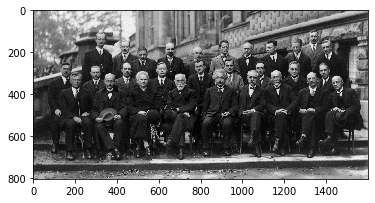

In [7]:
plt.imshow(solvay, cmap='gray')

In [8]:
face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')

In [36]:
def detect_face(img):
    
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img, minNeighbors=5, scaleFactor=1.2)
    
    for(x,y,w,h) in face_rects:
        
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (255,255,255), 10)
        
    return face_img

In [37]:
res1 = detect_face(nadia)
res2 = detect_face(denis)
res3 = detect_face(solvay)

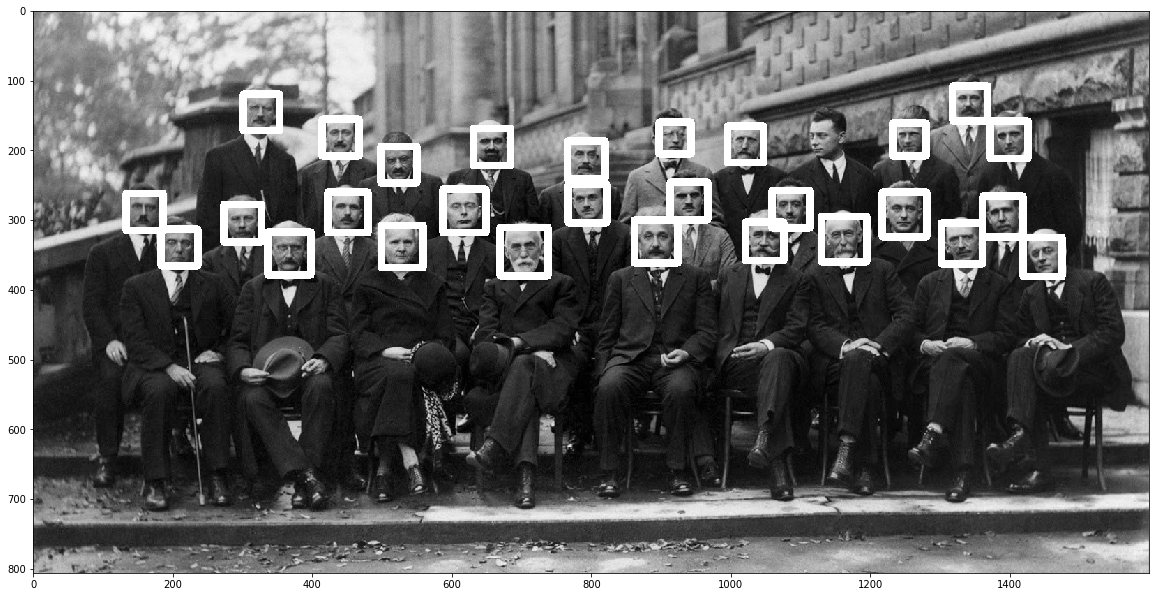

In [38]:
plt.figure(figsize=(20,20))
plt.imshow(res1, cmap='gray')
plt.imshow(res2, cmap='gray')
plt.imshow(res3, cmap='gray')

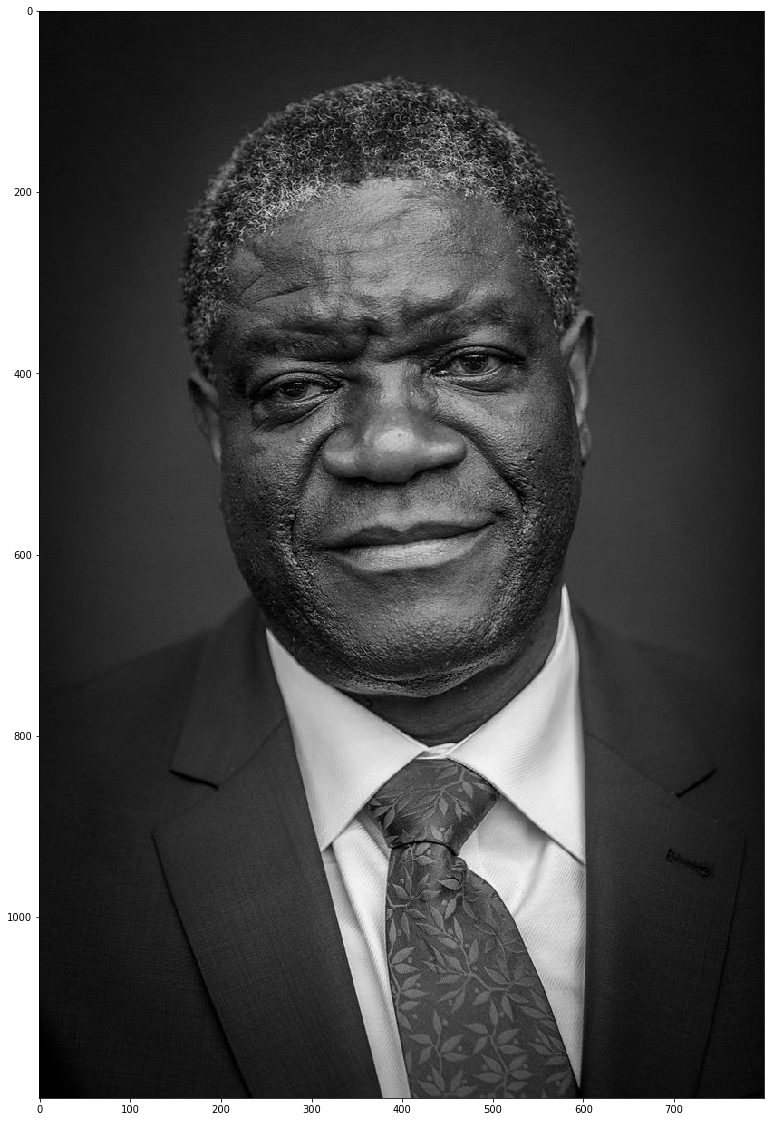

In [44]:
eye_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_eye.xml')

def detect_eye(img):
    
    face_img = img.copy()
    
    face_rects = eye_cascade.detectMultiScale(face_img, minNeighbors=5, scaleFactor=1.2)
    
    for(x,y,w,h) in face_rects:
        
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (255,255,255), 10)
        
    return face_img

res1 = detect_eye(nadia)
res2 = detect_eye(denis) # Can detect the eyes due to editing of the original photos
res3 = detect_eye(solvay)

plt.figure(figsize=(20,20))
plt.imshow(res1, cmap='gray')
plt.imshow(res2, cmap='gray')

In [ ]:
# Video testing on eye recognition

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read(0)
    frame = detect_eye(frame)
    cv2.imshow('Frame', frame)
    
    k = cv2.waitKey(1)
    
    if k == 27:
        break
        
cap.release()
cv2.destroyAllWindows()